In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_c12_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        19.9536 (16.5774, 23.7821) (16.4433, 23.6190)  7.1757 (Jnode 202)\n',
 't_n104        17.4237 (14.4102, 20.7549) (14.2940, 20.6208)  6.3268 (Jnode 201)\n',
 't_n105        16.7726 (13.8828, 19.9609) (13.8418, 19.9048)  6.0630 (Jnode 200)\n',
 't_n106        15.0605 (12.4887, 17.9015) (12.4279, 17.8269)  5.3990 (Jnode 199)\n',
 't_n107        14.6157 (12.1309, 17.3601) (12.0282, 17.2448)  5.2167 (Jnode 198)\n',
 't_n108        13.7971 (11.4619, 16.3782) (11.4133, 16.3168)  4.9035 (Jnode 197)\n',
 't_n109         6.6826 ( 5.6193,  7.8521) ( 5.5802,  7.8107)  2.2306 (Jnode 196)\n',
 't_n110         6.6260 ( 5.5713,  7.7847) ( 5.5459,  7.7560)  2.2101 (Jnode 195)\n',
 't_n111         6.4383 ( 5.4154,  7.5597) ( 5.3997,  7.5427)  2.1431 (Jnode 194)\n',
 't_n112         6.1957 ( 5.2115,  7.2709) ( 5.1819,  7.2391)  2.0572 (Jnode 193)\n',
 't_n113         5.9171 ( 4.9821,  6.9369) ( 4.9553,  6.9076)  1.9524 (Jnode 192)\n',
 't_n114         4.3376 ( 3.6862,  4.9948) ( 3.6873,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[19.9536,
 17.4237,
 16.7726,
 15.0605,
 14.6157,
 13.7971,
 6.6826,
 6.626,
 6.4383,
 6.1957,
 5.9171,
 4.3376,
 3.1169,
 2.3771,
 1.1989,
 4.5689,
 3.898,
 6.1688,
 4.0361,
 5.9111,
 4.7324,
 3.8488,
 3.1566,
 5.7152,
 5.3802,
 1.4075,
 6.3475,
 5.7065,
 4.3746,
 3.4751,
 3.9289,
 3.5763,
 2.9868,
 2.8858,
 12.8216,
 10.2456,
 13.9,
 12.7218,
 11.8627,
 9.6774,
 5.052,
 9.3166,
 8.1677,
 7.2618,
 6.1481,
 11.5187,
 10.6419,
 2.6864,
 1.1684,
 15.6897,
 14.628,
 13.1256,
 12.7457,
 13.8557,
 9.2078,
 11.3704,
 8.9957,
 16.9879,
 16.0096,
 14.5418,
 13.6843,
 11.5958,
 7.7394,
 10.2472,
 14.2685,
 4.3924,
 14.3769,
 8.1348,
 7.886,
 7.6678,
 7.2755,
 6.6687,
 6.3468,
 6.1174,
 5.8478,
 5.2089,
 4.4976,
 3.7827,
 5.2823,
 4.9574,
 3.9277,
 4.4784,
 5.7174,
 5.2698,
 4.8733,
 4.2269,
 2.8981,
 5.3873,
 4.8434,
 4.2843,
 6.325,
 5.9857,
 5.6675,
 5.0264,
 3.6815,
 5.6619,
 3.3757,
 2.6932,
 0.9861,
 7.823,
 6.6826]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_c12_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[20.7051,
 18.247,
 17.2668,
 15.4114,
 14.7867,
 13.4473,
 7.0638,
 6.9689,
 6.6165,
 6.2642,
 5.9145,
 4.365,
 3.1537,
 2.3386,
 1.3321,
 4.5732,
 3.7624,
 6.2445,
 4.0573,
 5.9035,
 4.6472,
 3.6897,
 3.3526,
 5.798,
 5.3514,
 1.7528,
 6.5379,
 5.7585,
 4.4051,
 3.4669,
 4.0271,
 3.539,
 2.8623,
 3.1562,
 12.368,
 10.1077,
 13.8413,
 12.4043,
 11.1851,
 9.0814,
 5.0401,
 8.9582,
 7.5576,
 6.499,
 5.3405,
 11.1778,
 10.0565,
 3.0,
 1.3802,
 15.5345,
 14.1325,
 12.2467,
 12.0053,
 13.3855,
 8.9569,
 10.9598,
 8.3257,
 17.5796,
 16.3013,
 14.5141,
 13.3264,
 11.2982,
 7.9856,
 9.7053,
 14.1861,
 5.4079,
 14.4261,
 9.6756,
 9.0824,
 8.5691,
 7.9517,
 7.1519,
 6.7038,
 6.3133,
 5.8323,
 5.0344,
 4.2368,
 3.4959,
 5.1578,
 4.7607,
 3.731,
 4.0686,
 5.8098,
 5.2068,
 4.642,
 3.9048,
 2.713,
 5.2731,
 4.6602,
 3.9896,
 6.5716,
 6.0368,
 5.4855,
 4.6899,
 3.2788,
 5.6691,
 3.9147,
 3.0099,
 1.2002,
 9.256,
 7.8105]

In [12]:
posterior_mean_iqtree

[19.9536,
 17.4237,
 16.7726,
 15.0605,
 14.6157,
 13.7971,
 6.6826,
 6.626,
 6.4383,
 6.1957,
 5.9171,
 4.3376,
 3.1169,
 2.3771,
 1.1989,
 4.5689,
 3.898,
 6.1688,
 4.0361,
 5.9111,
 4.7324,
 3.8488,
 3.1566,
 5.7152,
 5.3802,
 1.4075,
 6.3475,
 5.7065,
 4.3746,
 3.4751,
 3.9289,
 3.5763,
 2.9868,
 2.8858,
 12.8216,
 10.2456,
 13.9,
 12.7218,
 11.8627,
 9.6774,
 5.052,
 9.3166,
 8.1677,
 7.2618,
 6.1481,
 11.5187,
 10.6419,
 2.6864,
 1.1684,
 15.6897,
 14.628,
 13.1256,
 12.7457,
 13.8557,
 9.2078,
 11.3704,
 8.9957,
 16.9879,
 16.0096,
 14.5418,
 13.6843,
 11.5958,
 7.7394,
 10.2472,
 14.2685,
 4.3924,
 14.3769,
 8.1348,
 7.886,
 7.6678,
 7.2755,
 6.6687,
 6.3468,
 6.1174,
 5.8478,
 5.2089,
 4.4976,
 3.7827,
 5.2823,
 4.9574,
 3.9277,
 4.4784,
 5.7174,
 5.2698,
 4.8733,
 4.2269,
 2.8981,
 5.3873,
 4.8434,
 4.2843,
 6.325,
 5.9857,
 5.6675,
 5.0264,
 3.6815,
 5.6619,
 3.3757,
 2.6932,
 0.9861,
 7.823,
 6.6826]

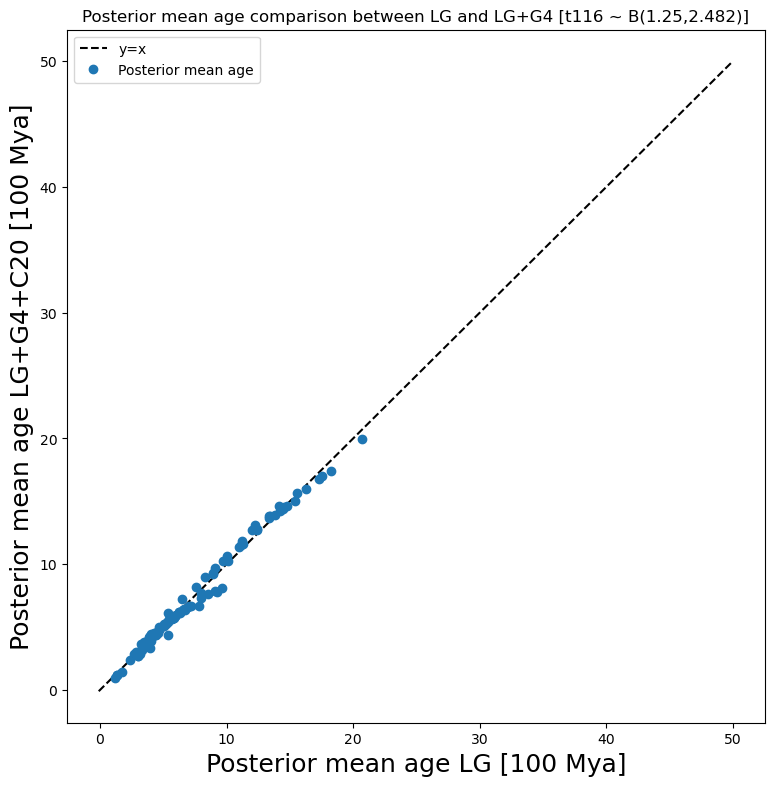

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t116 ~ B(1.25,2.482)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_c12_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')